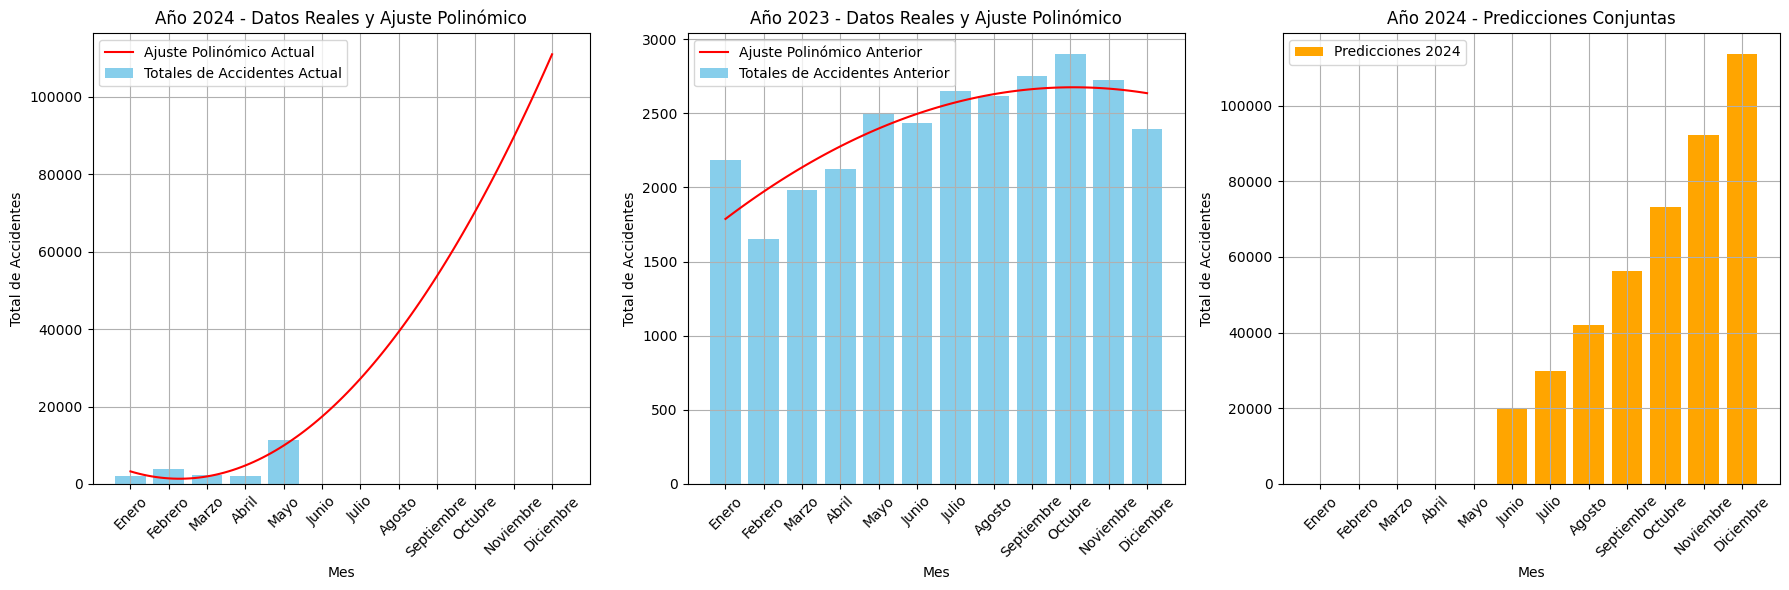

Predicciones de Accidentes para los Meses del 6 al 12 - Año Actual:
          Mes  Accidentes_Actual
0       Junio       17408.800000
1       Julio       27194.800000
2      Agosto       39299.085714
3  Septiembre       53721.657143
4     Octubre       70462.514286
5   Noviembre       89521.657143
6   Diciembre      110899.085714

Predicciones de Accidentes para los Meses del 6 al 12 - Año Anterior:
          Mes  Accidentes_Anterior
0       Junio          2496.472028
1       Julio          2573.569930
2      Agosto          2629.121379
3  Septiembre          2663.126374
4     Octubre          2675.584915
5   Noviembre          2666.497003
6   Diciembre          2635.862637

Predicciones de Accidentes para los Meses del 6 al 12 - Año 2024 (Conjunto):
           Mes  Accidentes_2024
0        Enero         0.000000
1      Febrero         0.000000
2        Marzo         0.000000
3        Abril         0.000000
4         Mayo         0.000000
5        Junio     19905.272028
6        Julio 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inicializar un diccionario para almacenar el total de accidentes por mes del año actual
accidentes_por_mes_actual = {
    "enero": 0,
    "febrero": 0,
    "marzo": 0,
    "abril": 0,
    "mayo": 0,
    "junio": 0,
    "julio": 0,
    "agosto": 0,
    "septiembre": 0,
    "octubre": 0,
    "noviembre": 0,
    "diciembre": 0
}

# Leer el archivo CSV del año actual
df_actual = pd.read_csv("datasets/ActuacionesBomberos_2024.csv", delimiter=';')

# Procesar el archivo CSV del año actual
for index, row in df_actual.iterrows():
    mes_actual = row['MES'].lower()  # Convertir a minúsculas para coincidir con las claves del diccionario
    accidentes_actual = row['TOTAL']  # Asegúrate de tener una columna 'TOTAL' con los datos de accidentes
    if mes_actual in accidentes_por_mes_actual:
        accidentes_por_mes_actual[mes_actual] += accidentes_actual

# Inicializar un diccionario para almacenar el total de accidentes por mes del año anterior
accidentes_por_mes_anterior = {
    "enero": 0,
    "febrero": 0,
    "marzo": 0,
    "abril": 0,
    "mayo": 0,
    "junio": 0,
    "julio": 0,
    "agosto": 0,
    "septiembre": 0,
    "octubre": 0,
    "noviembre": 0,
    "diciembre": 0
}

# Leer el archivo CSV del año anterior
df_anterior = pd.read_csv("datasets/ActuacionesBomberos_2023.csv", delimiter=';')

# Procesar el archivo CSV del año anterior
for index, row in df_anterior.iterrows():
    mes_anterior = row['MES'].lower()  # Convertir a minúsculas para coincidir con las claves del diccionario
    accidentes_anterior = row['TOTAL']  # Asegúrate de tener una columna 'TOTAL' con los datos de accidentes
    if mes_anterior in accidentes_por_mes_anterior:
        accidentes_por_mes_anterior[mes_anterior] += accidentes_anterior

# Asignar un valor numérico a cada mes (opcional para el ajuste polinómico)
meses_dict = {
    "enero": 1,
    "febrero": 2,
    "marzo": 3,
    "abril": 4,
    "mayo": 5,
    "junio": 6,
    "julio": 7,
    "agosto": 8,
    "septiembre": 9,
    "octubre": 10,
    "noviembre": 11,
    "diciembre": 12
}

# Filtrar los meses con más de 0 accidentes para el ajuste polinómico del año actual
meses_con_accidentes_actual = [meses_dict[mes] for mes in accidentes_por_mes_actual if accidentes_por_mes_actual[mes] > 0]
totales_accidentes_actual = [accidentes_por_mes_actual[mes] for mes in accidentes_por_mes_actual if accidentes_por_mes_actual[mes] > 0]

# Filtrar los meses con más de 0 accidentes para el ajuste polinómico del año anterior
meses_con_accidentes_anterior = [meses_dict[mes] for mes in accidentes_por_mes_anterior if accidentes_por_mes_anterior[mes] > 0]
totales_accidentes_anterior = [accidentes_por_mes_anterior[mes] for mes in accidentes_por_mes_anterior if accidentes_por_mes_anterior[mes] > 0]

# Ajuste polinómico de segundo grado para el año actual
coeficientes_actual = np.polyfit(meses_con_accidentes_actual, totales_accidentes_actual, 2)
polinomio_actual = np.poly1d(coeficientes_actual)

# Ajuste polinómico de segundo grado para el año anterior
coeficientes_anterior = np.polyfit(meses_con_accidentes_anterior, totales_accidentes_anterior, 2)
polinomio_anterior = np.poly1d(coeficientes_anterior)

# Crear puntos para la curva de ajuste del año actual
x_ajuste_actual = np.linspace(1, 12, 100)  # Rango de meses desde 1 hasta 12
y_ajuste_actual = polinomio_actual(x_ajuste_actual)

# Crear puntos para la curva de ajuste del año anterior
x_ajuste_anterior = np.linspace(1, 12, 100)  # Rango de meses desde 1 hasta 12
y_ajuste_anterior = polinomio_anterior(x_ajuste_anterior)

# Predecir el número de accidentes en los meses del 6 al 12 del año actual
predicciones_actual = []
for mes_num in range(6, 13):
    mes_actual = list(meses_dict.keys())[list(meses_dict.values()).index(mes_num)]
    prediccion_actual = polinomio_actual(mes_num)
    predicciones_actual.append((mes_actual.capitalize(), prediccion_actual))

# Predecir el número de accidentes en los meses del 6 al 12 del año anterior
predicciones_anterior = []
for mes_num in range(6, 13):
    mes_anterior = list(meses_dict.keys())[list(meses_dict.values()).index(mes_num)]
    prediccion_anterior = polinomio_anterior(mes_num)
    predicciones_anterior.append((mes_anterior.capitalize(), prediccion_anterior))

# Crear DataFrames con las predicciones del año actual y del año anterior
df_predicciones_actual = pd.DataFrame(predicciones_actual, columns=['Mes', 'Accidentes_Actual'])
df_predicciones_anterior = pd.DataFrame(predicciones_anterior, columns=['Mes', 'Accidentes_Anterior'])

# Unir las predicciones del año actual y del año anterior en un solo DataFrame para el año 2024
predicciones_2024 = []
for mes_num in range(1, 13):
    mes_actual = list(meses_dict.keys())[list(meses_dict.values()).index(mes_num)]
    prediccion_actual = polinomio_actual(mes_num) if mes_num >= 6 else 0
    prediccion_anterior = polinomio_anterior(mes_num) if mes_num >= 6 else 0
    prediccion_conjunta = prediccion_actual + prediccion_anterior  # Suma de las predicciones de ambos años
    predicciones_2024.append((mes_actual.capitalize(), prediccion_conjunta))

# Crear DataFrame con las predicciones conjuntas para el año 2024
df_predicciones_2024 = pd.DataFrame(predicciones_2024, columns=['Mes', 'Accidentes_2024'])

# Graficar los totales por mes y la curva de ajuste para ambos años y las predicciones conjuntas para el año 2024
plt.figure(figsize=(18, 6))

# Gráfico para el año actual
plt.subplot(1, 3, 1)
plt.bar(range(1, 13), [accidentes_por_mes_actual[mes] for mes in meses_dict.keys()], color='skyblue', label='Totales de Accidentes Actual')
plt.plot(x_ajuste_actual, y_ajuste_actual, color='red', label='Ajuste Polinómico Actual')
plt.xlabel('Mes')
plt.ylabel('Total de Accidentes')
plt.title('Año 2024 - Datos Reales y Ajuste Polinómico')
plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.legend()
plt.grid(True)

# Gráfico para el año anterior
plt.subplot(1, 3, 2)
plt.bar(range(1, 13), [accidentes_por_mes_anterior[mes] for mes in meses_dict.keys()], color='skyblue', label='Totales de Accidentes Anterior')
plt.plot(x_ajuste_anterior, y_ajuste_anterior, color='red', label='Ajuste Polinómico Anterior')
plt.xlabel('Mes')
plt.ylabel('Total de Accidentes')
plt.title('Año 2023 - Datos Reales y Ajuste Polinómico')
plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.legend()
plt.grid(True)

# Gráfico para el año 2024 (predicciones conjuntas)
plt.subplot(1, 3, 3)
plt.bar(range(1, 13), df_predicciones_2024['Accidentes_2024'], color='orange', label='Predicciones 2024')
plt.xlabel('Mes')
plt.ylabel('Total de Accidentes')
plt.title('Año 2024 - Predicciones Conjuntas')
plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.legend()
plt.grid(True)

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

# Mostrar los DataFrames con las predicciones
print("Predicciones de Accidentes para los Meses del 6 al 12 - Año Actual:")
print(df_predicciones_actual)

print("\nPredicciones de Accidentes para los Meses del 6 al 12 - Año Anterior:")
print(df_predicciones_anterior)

# Mostrar las predicciones conjuntas para el año 2024
print("\nPredicciones de Accidentes para los Meses del 6 al 12 - Año 2024 (Conjunto):")
print(df_predicciones_2024)

